# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
from pathlib import Path
image_path = Path("TarantulaNebula.jpg")

A = imread(image_path)

Visualize the picture

(np.float64(-0.5), np.float64(629.5), np.float64(566.5), np.float64(-0.5))

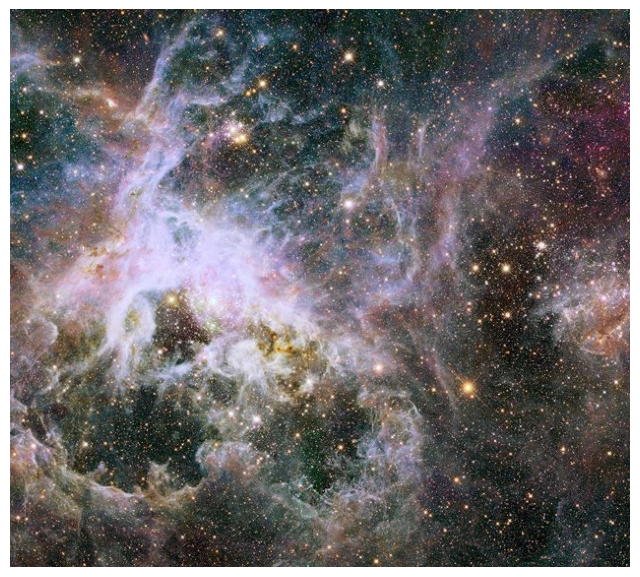

In [2]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

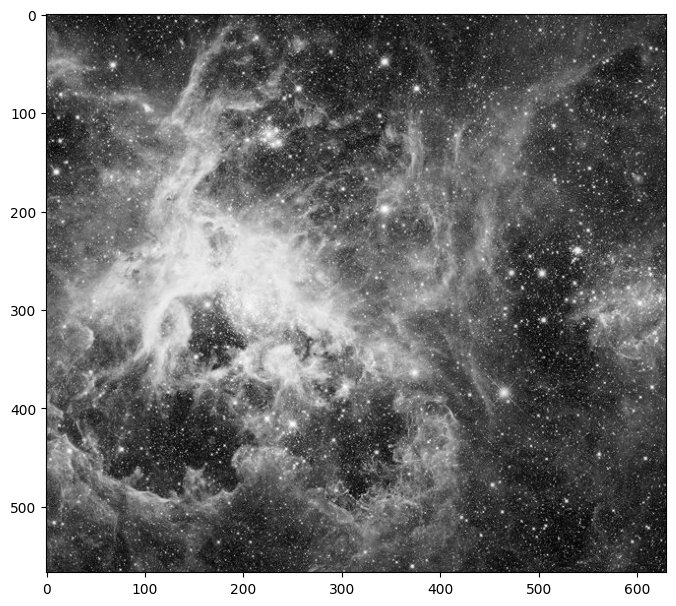

In [4]:
A = A.mean(axis=2)  # convert to grayscale
plt.imshow(A, cmap='gray')

What is the picture size?

In [5]:
A.shape

(567, 630)

Perform the SVD decomposition

In [15]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4q/3p2yjtxj5xvgw2c4slb2vvxw0000gn/T/ipykernel_13811/2879097694.py:5: SyntaxWarning: invalid escape sequence '\s'
  axs[0].set_title('Singular Values $\sigma_k$')
/var/folders/4q/3p2yjtxj5xvgw2c4slb2vvxw0000gn/T/ipykernel_13811/2879097694.py:7: SyntaxWarning: invalid escape sequence '\s'
  axs[0].set_ylabel('$\sigma_k$')
/var/folders/4q/3p2yjtxj5xvgw2c4slb2vvxw0000gn/T/ipykernel_13811/2879097694.py:12: SyntaxWarning: invalid escape sequence '\s'
  axs[1].set_title('Cumulative Fraction $\sum_{i=1}^k \sigma_i / \sum_{i=1}^q \sigma_i$')
/var/folders/4q/3p2yjtxj5xvgw2c4slb2vvxw0000

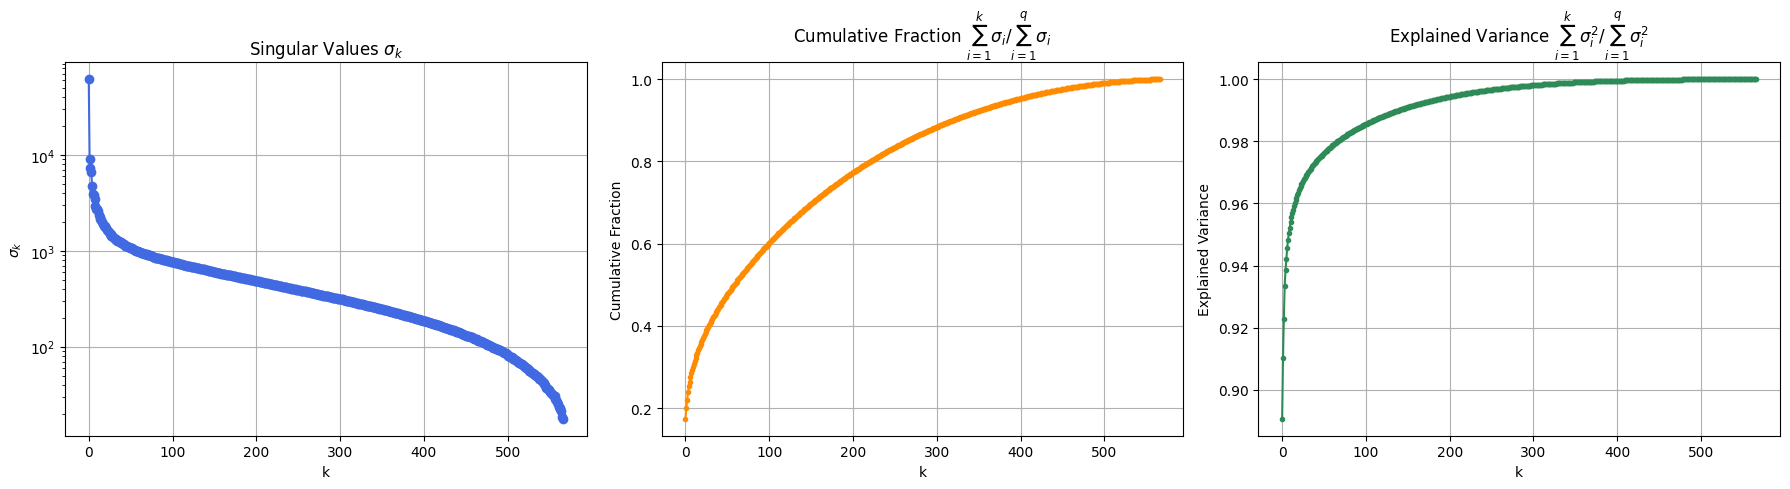

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Singular values
axs[0].semilogy(S, marker='o', linestyle='-', color='royalblue')
axs[0].set_title('Singular Values $\sigma_k$')
axs[0].set_xlabel('k')
axs[0].set_ylabel('$\sigma_k$')
axs[0].grid(True)

# Cumulative fraction of singular values
axs[1].plot(np.cumsum(S) / np.sum(S), marker='.', linestyle='-', color='darkorange')
axs[1].set_title('Cumulative Fraction $\sum_{i=1}^k \sigma_i / \sum_{i=1}^q \sigma_i$')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Cumulative Fraction')
axs[1].grid(True)

# Explained variance
axs[2].plot(np.cumsum(S**2) / np.sum(S**2), marker='.', linestyle='-', color='seagreen')
axs[2].set_title('Explained Variance $\sum_{i=1}^k \sigma_i^2 / \sum_{i=1}^q \sigma_i^2$')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Explained Variance')
axs[2].grid(True)

plt.tight_layout()

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

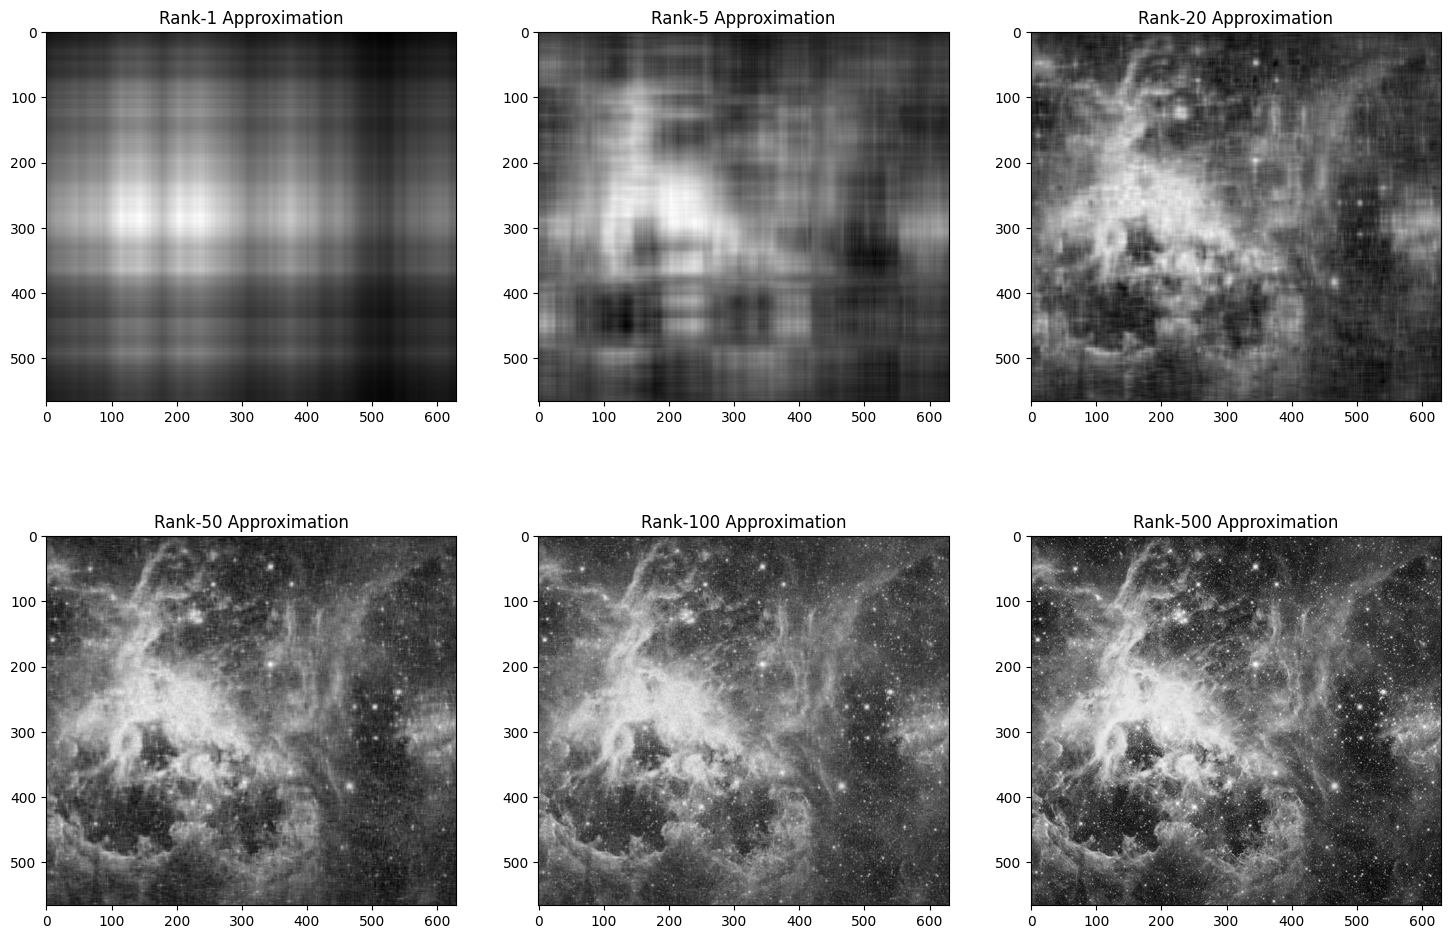

In [18]:
ks = [1, 5, 20, 50, 100, 500]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i,k in enumerate(ks):
    A_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    
    axs.flat[i].imshow(A_k, cmap='gray')
    axs.flat[i].set_title(f'Rank-{k} Approximation')

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

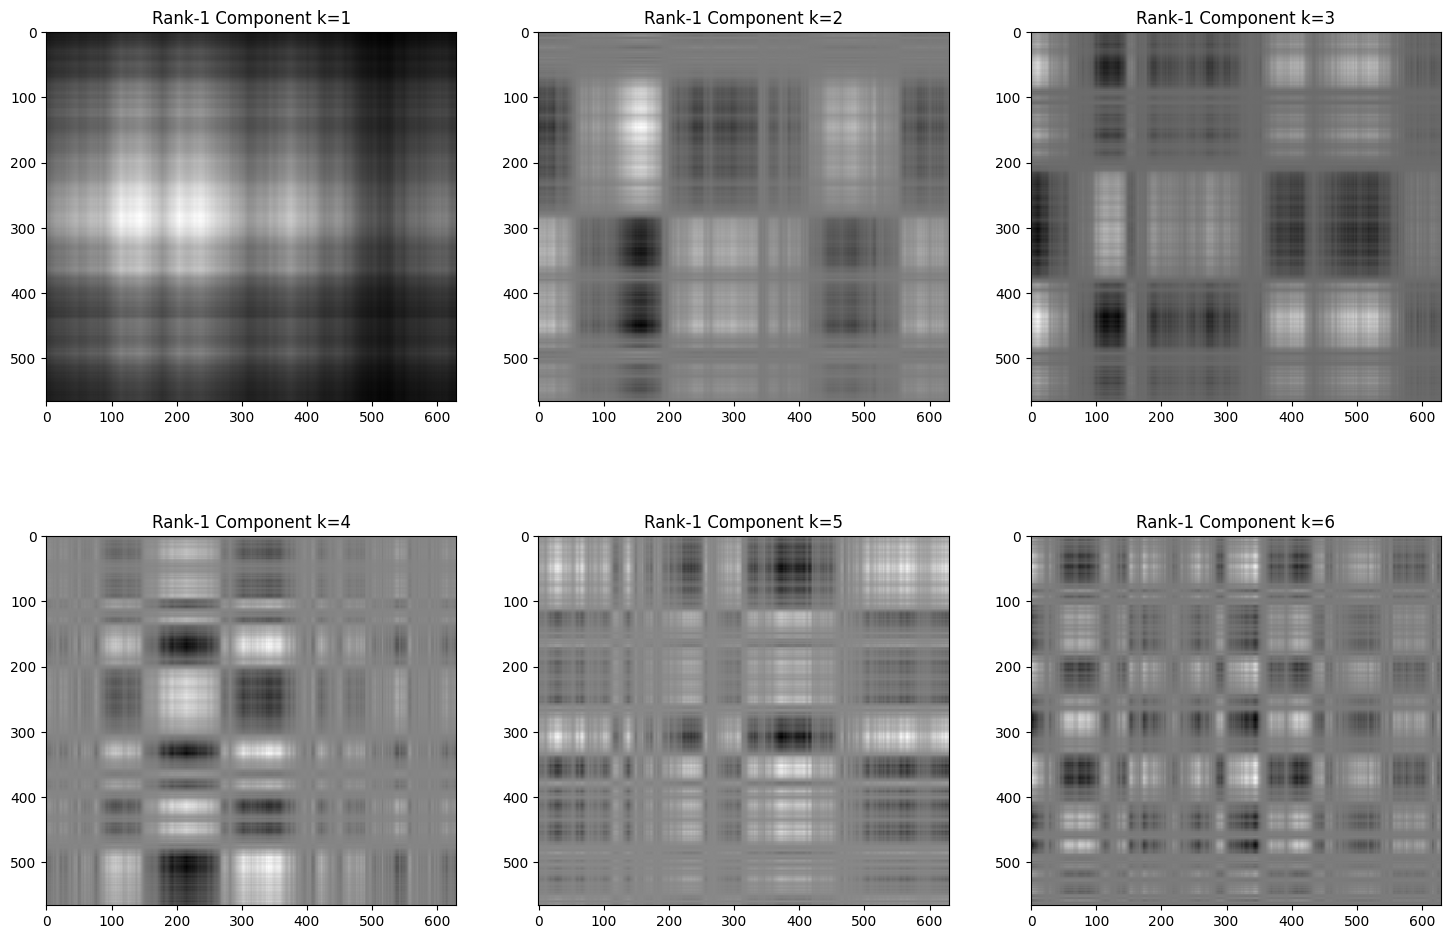

In [19]:
fig, axs = plt.subplots(2,3, figsize=(18,12))

for k in range(1,7):
    rank_one = U[:,k-1:k] @ np.diag(S[k-1:k]) @ Vt[k-1:k,:]

    axs.flat[k-1].imshow(rank_one, cmap='gray')
    axs.flat[k-1].set_title(f'Rank-1 Component k={k}')